In [ ]:
pip install tensorflow==2.13.0 tensorflow-addons keras pillow numpy matplotlib scikit-learn

ERROR: Could not find a version that satisfies the requirement tensorflow==2.13.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.13.0
Note: you may need to restart the kernel to use updated packages.


Data Train test validation split Baseline

TASK 1: BASELINE PREPROCESSING

Creating directory structure...
Directory structure created!

VISUALIZING PREPROCESSING PIPELINE

Processing sample from BG...


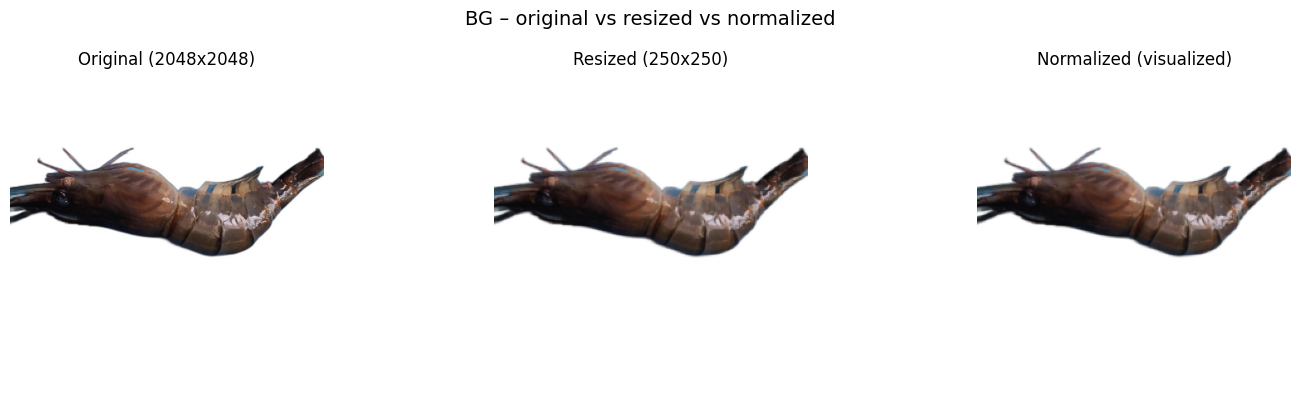

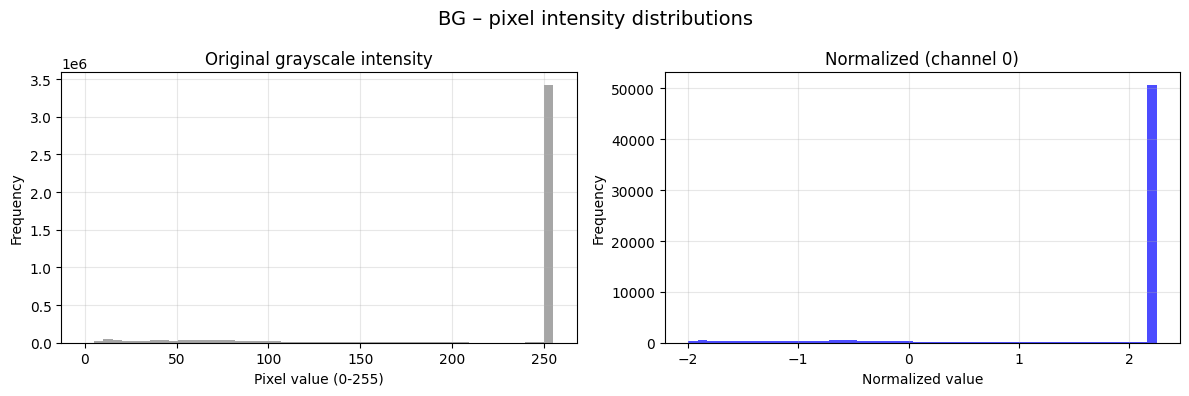


Processing sample from Healthy...


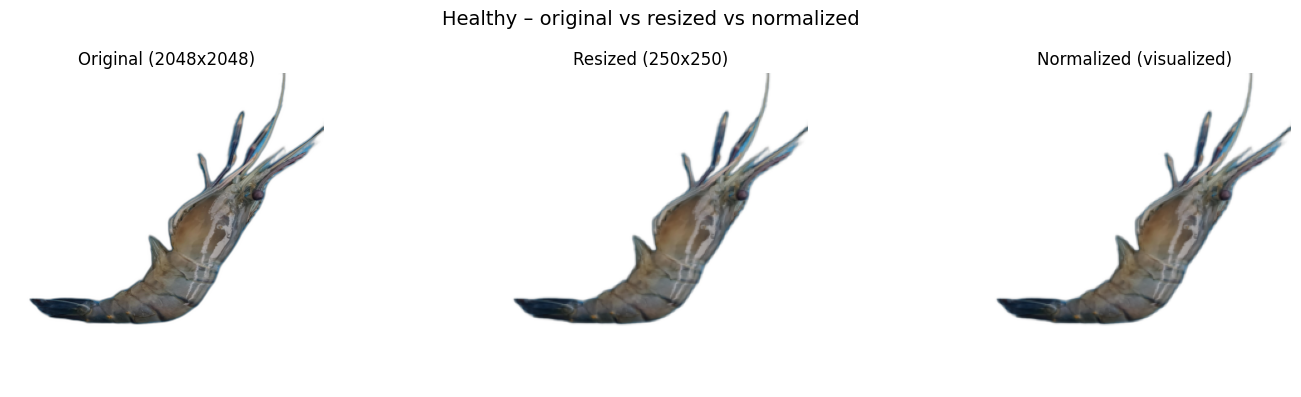

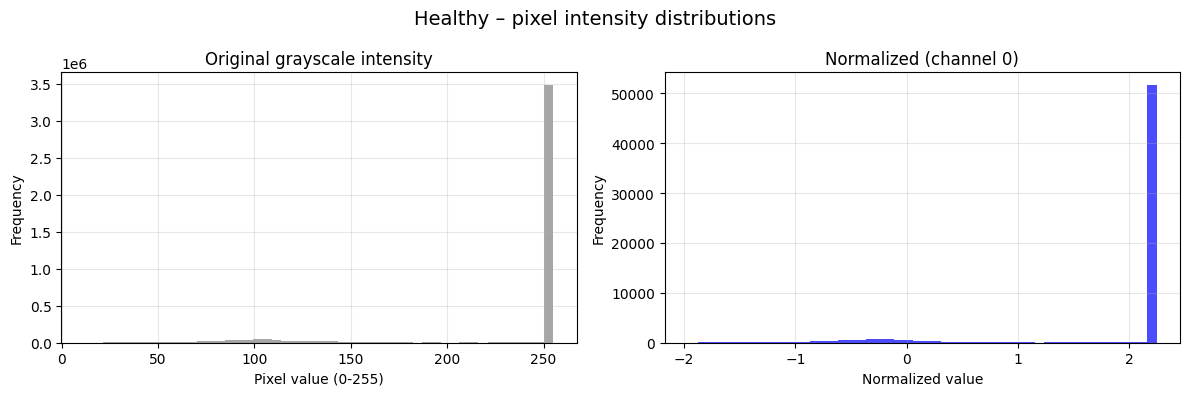


Processing sample from WSSV...


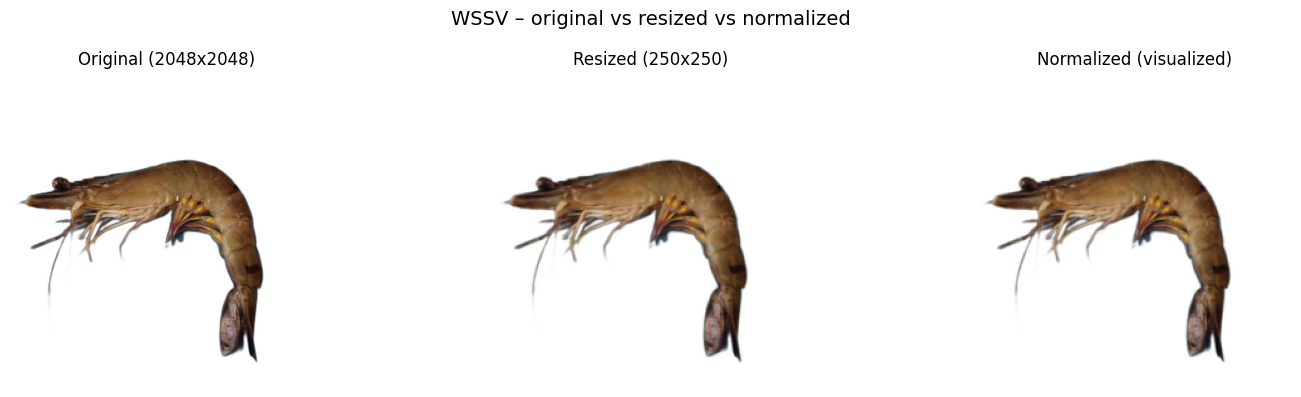

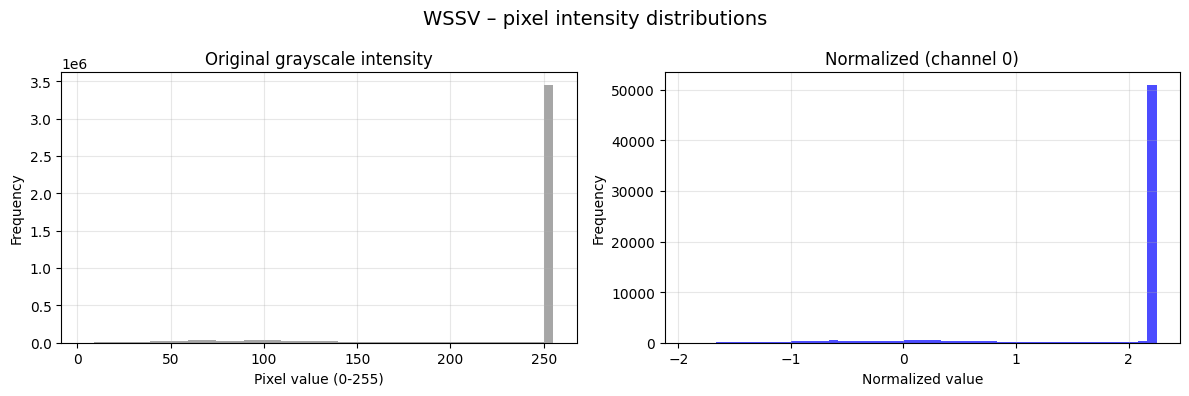


Processing sample from WSSV_BG...


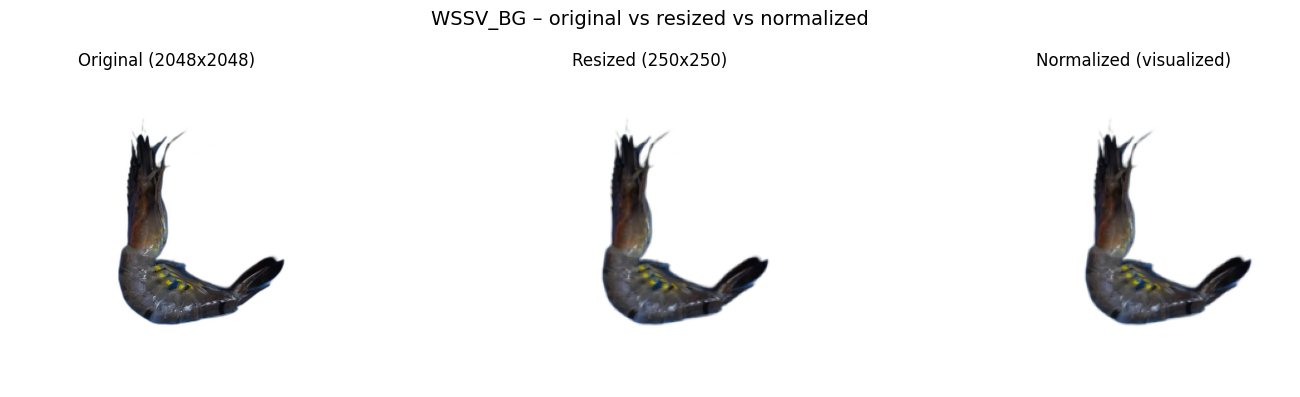

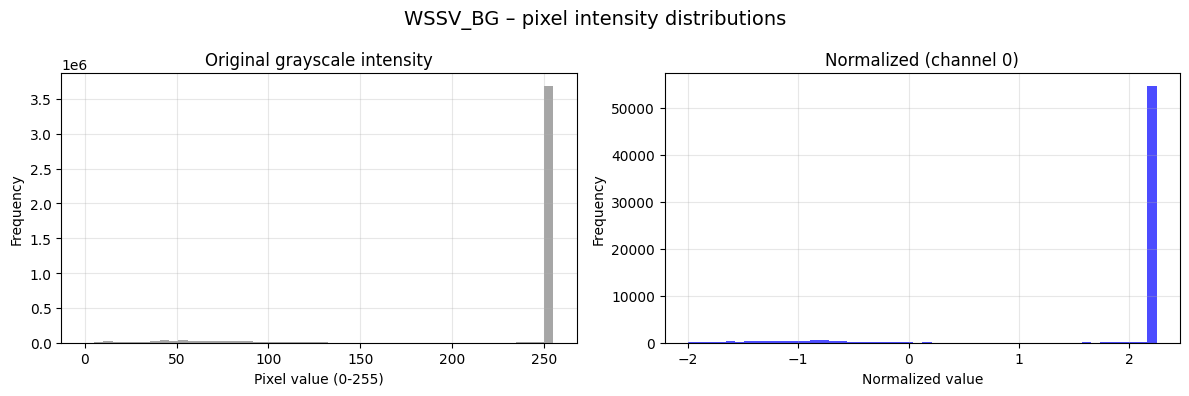


PROCESSING AND SPLITTING DATASET

Processing class: BG
Total images found: 198
Training images: 138 (70%)
Testing images: 30 (15%)
Validation images: 30 (15%)

Processing train images...

Processing test images...

Processing validation images...
Class BG completed!

Processing class: Healthy
Total images found: 403
Training images: 282 (70%)
Testing images: 60 (15%)
Validation images: 61 (15%)

Processing train images...

Processing test images...

Processing validation images...
Class Healthy completed!

Processing class: WSSV
Total images found: 328
Training images: 229 (70%)
Testing images: 49 (15%)
Validation images: 50 (15%)

Processing train images...

Processing test images...

Processing validation images...
Class WSSV completed!

Processing class: WSSV_BG
Total images found: 220
Training images: 154 (70%)
Testing images: 33 (15%)
Validation images: 33 (15%)

Processing train images...

Processing test images...

Processing validation images...
Class WSSV_BG completed!

DATAS

In [ ]:
"""
Task 1: Baseline Preprocessing and Train-Test-Validation Split
- Resize images to 250x250
- Normalize images
- Visualize original vs normalized
- Split into 70% train, 15% test, 15% validation
- Create baseline-ttvs.zip
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import zipfile

# Configuration
IMG_SIZE = 250
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

# Paths
SOURCE_BASE_DIR = '/kaggle/input/elsevier-disease-shrimp-data/Elsevier_ShrimpImages'
WORKING_DIR = '/kaggle/working'
OUTPUT_BASE_DIR = os.path.join(WORKING_DIR, 'baseline_split')
ZIP_NAME = 'baseline-ttvs.zip'

# Class names and sample counts
CLASSES = ['BG', 'Healthy', 'WSSV', 'WSSV_BG']
CLASS_COUNTS = {'BG': 198, 'Healthy': 403, 'WSSV': 328, 'WSSV_BG': 220}

'''
Reasoning for image resizing from 2048x2047 to 250x250:
Reducing image resolution significantly decreases computational requirements and memory usage
during training, making it feasible to train deep learning models with limited resources. The
250x250 resolution maintains sufficient spatial information for disease classification while
enabling faster processing and larger batch sizes, which improves model convergence.
'''

'''
Reasoning for normalization:
Normalizing images using ImageNet statistics (mean and std) centers the pixel values around zero
and scales them to unit variance. This standardization accelerates neural network training by
preventing gradient vanishing/exploding, ensures balanced feature contributions across channels,
and enables transfer learning from pre-trained models. Normalized inputs lead to more stable
optimization and improved predictive performance.
'''

print("="*60)
print("TASK 1: BASELINE PREPROCESSING")
print("="*60)

# Create directory structure
print("\nCreating directory structure...")
for split in ['train', 'test', 'validation']:
    for class_name in CLASSES:
        os.makedirs(os.path.join(OUTPUT_BASE_DIR, split, class_name), exist_ok=True)

print("Directory structure created!")


def normalize_image(img_array):
    """Normalize image using ImageNet statistics"""
    img_array = img_array.astype(np.float32) / 255.0
    for i in range(3):
        img_array[:, :, i] = (img_array[:, :, i] - IMAGENET_MEAN[i]) / IMAGENET_STD[i]
    return img_array


def denormalize_image(img_array):
    """Denormalize for visualization"""
    img_denorm = np.copy(img_array)
    for i in range(3):
        img_denorm[:, :, i] = (img_denorm[:, :, i] * IMAGENET_STD[i]) + IMAGENET_MEAN[i]
    return np.clip(img_denorm, 0, 1)


def visualize_preprocessing(image_path, class_name):
    """Show original, resized, and normalized images with histograms"""
    # Load original image
    original = Image.open(image_path).convert('RGB')
    original_array = np.array(original)

    # Resize
    resized = original.resize((IMG_SIZE, IMG_SIZE), Image.BILINEAR)
    resized_array = np.array(resized)

    # Normalize
    normalized_array = normalize_image(resized_array.copy())

    # Denormalize for visualization
    display_normalized = denormalize_image(normalized_array)

    # Plot images
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f"{class_name} – original vs resized vs normalized", fontsize=14)

    axes[0].imshow(original_array)
    axes[0].set_title(f"Original ({original.size[0]}x{original.size[1]})")
    axes[0].axis('off')

    axes[1].imshow(resized_array)
    axes[1].set_title(f"Resized ({IMG_SIZE}x{IMG_SIZE})")
    axes[1].axis('off')

    axes[2].imshow(display_normalized)
    axes[2].set_title("Normalized (visualized)")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Plot histograms
    # Convert to grayscale for intensity analysis
    original_gray = np.array(original.convert('L')).flatten()
    normalized_ch0 = normalized_array[:, :, 0].flatten()

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"{class_name} – pixel intensity distributions", fontsize=14)

    axes[0].hist(original_gray, bins=50, color='gray', alpha=0.7)
    axes[0].set_title("Original grayscale intensity")
    axes[0].set_xlabel("Pixel value (0-255)")
    axes[0].set_ylabel("Frequency")
    axes[0].grid(True, alpha=0.3)

    axes[1].hist(normalized_ch0, bins=50, color='blue', alpha=0.7)
    axes[1].set_title("Normalized (channel 0)")
    axes[1].set_xlabel("Normalized value")
    axes[1].set_ylabel("Frequency")
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# Visualize one sample from each class
print("\n" + "="*60)
print("VISUALIZING PREPROCESSING PIPELINE")
print("="*60)

for class_name in CLASSES:
    class_dir = os.path.join(SOURCE_BASE_DIR, class_name)
    if os.path.exists(class_dir):
        files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if files:
            sample_file = os.path.join(class_dir, files[0])
            print(f"\nProcessing sample from {class_name}...")
            visualize_preprocessing(sample_file, class_name)


# Process and split dataset
print("\n" + "="*60)
print("PROCESSING AND SPLITTING DATASET")
print("="*60)

all_stats = {}

for class_name in CLASSES:
    print(f"\n{'='*50}")
    print(f"Processing class: {class_name}")
    print(f"{'='*50}")

    source_class_dir = os.path.join(SOURCE_BASE_DIR, class_name)

    if not os.path.exists(source_class_dir):
        print(f"Warning: Directory {source_class_dir} does not exist. Skipping...")
        continue

    # Get all image files
    all_files = [f for f in os.listdir(source_class_dir)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"Total images found: {len(all_files)}")

    if len(all_files) == 0:
        print(f"No images found. Skipping...")
        continue

    # Split: 70% train, 15% test, 15% validation
    train_files, temp_files = train_test_split(all_files, test_size=0.3, random_state=42)
    test_files, val_files = train_test_split(temp_files, test_size=0.5, random_state=42)

    print(f"Training images: {len(train_files)} (70%)")
    print(f"Testing images: {len(test_files)} (15%)")
    print(f"Validation images: {len(val_files)} (15%)")

    all_stats[class_name] = {
        'total': len(all_files),
        'train': len(train_files),
        'test': len(test_files),
        'validation': len(val_files)
    }

    # Process and copy files
    for split, files in [('train', train_files), ('test', test_files), ('validation', val_files)]:
        print(f"\nProcessing {split} images...")
        for fname in files:
            src = os.path.join(source_class_dir, fname)
            dst = os.path.join(OUTPUT_BASE_DIR, split, class_name, fname)

            # Load, resize, and save
            try:
                img = Image.open(src).convert('RGB')
                img_resized = img.resize((IMG_SIZE, IMG_SIZE), Image.BILINEAR)
                img_resized.save(dst, quality=95)
            except Exception as e:
                print(f"Error processing {fname}: {e}")

    print(f"Class {class_name} completed!")


# Print summary
print("\n" + "="*60)
print("DATASET SPLIT SUMMARY")
print("="*60)

for class_name in CLASSES:
    if class_name in all_stats:
        stats = all_stats[class_name]
        print(f"\n{class_name}:")
        print(f"  Total images: {stats['total']}")
        print(f"  Training: {stats['train']} ({stats['train']/stats['total']*100:.1f}%)")
        print(f"  Testing: {stats['test']} ({stats['test']/stats['total']*100:.1f}%)")
        print(f"  Validation: {stats['validation']} ({stats['validation']/stats['total']*100:.1f}%)")


# Verify directory structure
print("\n" + "="*60)
print("FINAL DIRECTORY STRUCTURE")
print("="*60)

for split in ['train', 'test', 'validation']:
    print(f"\n{split.upper()} directories:")
    for class_name in CLASSES:
        split_dir = os.path.join(OUTPUT_BASE_DIR, split, class_name)
        if os.path.exists(split_dir):
            count = len(os.listdir(split_dir))
            print(f"  {split}/{class_name}: {count} images")


# Create zip file
print("\n" + "="*60)
print("CREATING ZIP FILE")
print("="*60)

zip_path = os.path.join(WORKING_DIR, ZIP_NAME)
print(f"Creating {ZIP_NAME}...")

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for split in ['train', 'test', 'validation']:
        for class_name in CLASSES:
            split_dir = os.path.join(OUTPUT_BASE_DIR, split, class_name)
            if os.path.exists(split_dir):
                for fname in os.listdir(split_dir):
                    file_path = os.path.join(split_dir, fname)
                    arcname = os.path.join(split, class_name, fname)
                    zipf.write(file_path, arcname)

print(f"Zip file created: {zip_path}")
print(f"Size: {os.path.getsize(zip_path) / (1024*1024):.2f} MB")

print("\n" + "="*60)
print("TASK 1 COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"\nOutput: {ZIP_NAME}")
print("The zip file contains train/test/validation splits with preprocessed images.")